In [ ]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df = df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"],axis = 1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Short Explanation:

Spam → Unwanted or junk messages (usually ads, scams, promotions, etc.)

Ham → Genuine messages (real user ke regular SMS ya email)

# Spam detection data visulaization

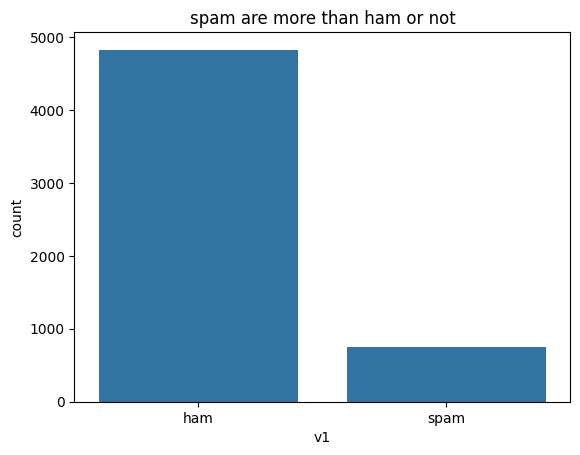

In [ ]:
sns.countplot(x = "v1" , data = df)
plt.title("spam are more than ham or not")
plt.show()

Non spam messages are more than the spam one let see our model can predict with more accuratly or not but first of all we need to clean the text in v2 column

# Text Cleaning

In [ ]:
# converting into lower case.
def lowercasing(txt):
  if type(txt) == str:
    return txt.lower()
df["v2"] = df["v2"].apply(lowercasing)

In [ ]:
df

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [ ]:
# remove punctuation
import string
def remove_punctuation(txt):
  return txt.translate(str.maketrans("","",string.punctuation))
df["v2"] = df["v2"].apply(remove_punctuation)

In [ ]:
df

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


In [ ]:
# remove numbers
def remove_numbers(txt):
  new = ""
  for i in txt:
    if not i.isdigit():
      new += i
  return new
df["v2"] = df["v2"].apply(remove_numbers)

In [ ]:
# Remove URLs and email address
def remove_url_email(txt):
  new = ""
  for i in txt.split():
    if not ("http" in i or "@" in i):
      new += i + " "
  return new
df["v2"] = df["v2"].apply(remove_url_email)

In [ ]:
# remove stopwords
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
def remove_stopwords(txt):
  words = txt.split()
  cleaned = []
  for i in words:
    if not i in stop_words:
      cleaned.append(i)
  return " ".join(cleaned)
df["v2"] = df["v2"].apply(remove_stopwords)

In [ ]:
df

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,nd time tried contact u u å£ pound prize claim...
5568,ham,ì b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [ ]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [ ]:
# remove special characters
# Remove extra whitespace
# Stemming or Lemmatization
# I didn't use this thing

In [ ]:
# handle contractions
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
import contractions
def expand_contractions(txt):
  expanded_words = [contractions.fix(word) for word in txt.split()]
  return ' '.join(expanded_words)
df["v2"] = df["v2"].apply(expand_contractions)

In [ ]:
df.head()

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif you oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,you dun say early hor you c already say
4,ham,nah do not think goes usf lives around though


In [ ]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["v2"], df["v1"], test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

bow_vectorize = CountVectorizer()
x_train_bow = bow_vectorize.fit_transform(x_train)
x_test_bow = bow_vectorize.transform(x_test)

nb_model = MultinomialNB()
nb_model.fit(x_train_bow, y_train)

pred_bow = nb_model.predict(x_test_bow)
print(accuracy_score(y_test, pred_bow))

0.979372197309417


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorize = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.9, stop_words='english'
)
x_train_tfidf = tfidf_vectorize.fit_transform(x_train)
x_test_tfidf = tfidf_vectorize.transform(x_test)

nb2_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear'
)
nb2_model.fit(x_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [ ]:
proba = nb2_model.predict_proba(x_test_tfidf)[:, 1]
y_pred_nb2 = (proba > 0.25).astype(int)
print(accuracy_score(y_test, y_pred_nb2))

0.9147982062780269


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train_tfidf,y_train)
log_pred = logistic_model.predict(x_test_tfidf)
print(accuracy_score(y_test,log_pred))

0.9479820627802691


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb2))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       965
           1       0.62      0.96      0.75       150

    accuracy                           0.91      1115
   macro avg       0.81      0.93      0.85      1115
weighted avg       0.94      0.91      0.92      1115



In [ ]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("seaborn",sns.__version__)
print("sklearn",sklearn.__version__)
print("nltk",nltk.__version__)

numpy 2.0.2
pandas 2.2.2
seaborn 0.13.2
sklearn 1.6.1
nltk 3.9.1


In [ ]:
!pip install joblib

In [ ]:
import pickle
with open("NB_Spam_model.pkl", "wb") as f:
    pickle.dump(nb2_model, f)

In [ ]:
import pickle
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorize, f)